# **Informações Iniciais**

### *Bibliotecas e Estatísticas Gerais*

**Bibliotecas e Datasets**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from warnings import filterwarnings
filterwarnings('ignore')

#Normalização dos Dados
from sklearn.preprocessing import StandardScaler

#Modelos Utilizados
from sklearn.cluster import KMeans, MiniBatchKMeans

#Métricas de Avaliação de Clusters 
from sklearn.metrics import silhouette_score

In [2]:
olist_customers = pd.read_csv("../datasets/olist_customers_dataset.csv", sep=",")
olist_orders = pd.read_csv("../datasets/olist_orders_dataset.csv", sep=",")
olist_order_payments = pd.read_csv("../datasets/olist_order_payments_dataset.csv", sep=",")
olist_order_reviews = pd.read_csv("../datasets/olist_order_reviews_dataset.csv", sep=",")
olist_order_items = pd.read_csv("../datasets/olist_order_items_dataset.csv", sep=",")

In [3]:
dataframe = olist_customers.merge(olist_orders, on="customer_id") \
                           .merge(olist_order_payments, on="order_id") \
                           .merge(olist_order_reviews, on="order_id") \
                           .merge(olist_order_items, on="order_id")

**Informações Gerais**

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    117329 non-null  object 
 1   customer_unique_id             117329 non-null  object 
 2   customer_zip_code_prefix       117329 non-null  int64  
 3   customer_city                  117329 non-null  object 
 4   customer_state                 117329 non-null  object 
 5   order_id                       117329 non-null  object 
 6   order_status                   117329 non-null  object 
 7   order_purchase_timestamp       117329 non-null  object 
 8   order_approved_at              117314 non-null  object 
 9   order_delivered_carrier_date   116094 non-null  object 
 10  order_delivered_customer_date  114858 non-null  object 
 11  order_estimated_delivery_date  117329 non-null  object 
 12  payment_sequential            

In [5]:
dataframe.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value'],
      dtype='object')

In [6]:
dataframe.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [7]:
valores_vazios = round(dataframe.isnull().mean() * 100, 2)
valores_vazios[valores_vazios > 0].sort_values(ascending=False)

review_comment_title             88.16
review_comment_message           57.66
order_delivered_customer_date     2.11
order_delivered_carrier_date      1.05
order_approved_at                 0.01
dtype: float64

### *Criando Novas Métricas para o Cluster*

In [8]:
#Total de pedidos feitos por cliente
total_orders_per_customer = dataframe.groupby('customer_unique_id').agg({'order_id':'nunique'}).reset_index()
total_orders_per_customer.columns = ['customer_unique_id', 'total_orders_per_customer']
dataframe_add = pd.merge(dataframe, total_orders_per_customer, on="customer_unique_id")

In [9]:
#Total Gasto por cliente
total_spend_per_client = dataframe_add.groupby('customer_unique_id').agg({'payment_value':'sum'}).reset_index()
total_spend_per_client.columns = ['customer_unique_id', 'total_spend_per_client']
dataframe_add = pd.merge(dataframe_add, total_spend_per_client, on="customer_unique_id")

In [10]:
#Valor Médio Gasto por Usuário
dataframe_add['avg_total_spend_per_client'] = dataframe_add['total_spend_per_client'] / dataframe_add['total_orders_per_customer']

In [11]:
#Valor médio do frete por cliente
dataframe_add['avg_freight_value'] = dataframe_add.groupby('customer_unique_id')['freight_value'].transform('mean')

'''
OU aproveitar a primeira métrica criada para fazer a média tbm
dataframe_add['avg_freight_value'] = dataframe_add['freight_value'] / dataframe_add['total_orders_per_customer']
'''

"\nOU aproveitar a primeira métrica criada para fazer a média tbm\ndataframe_add['avg_freight_value'] = dataframe_add['freight_value'] / dataframe_add['total_orders_per_customer']\n"

In [12]:
#Tempo médio de entrega por cliente
dataframe_add['avg_time_delivered'] = (pd.to_datetime(dataframe_add['order_delivered_customer_date']) - pd.to_datetime(dataframe_add['order_purchase_timestamp'])).dt.days
dataframe_add['avg_time_delivered'] = dataframe_add.groupby('customer_unique_id')['avg_time_delivered'].transform('mean')

In [13]:
#Quantidade de dias desde a última compra (usando como referência a data mais recente da base)
dataframe_add['order_purchase_timestamp'] = pd.to_datetime(dataframe_add['order_purchase_timestamp'])
dataframe_add['days_since_last_purchase'] = (dataframe_add['order_purchase_timestamp'].max() - dataframe_add.groupby('customer_unique_id')['order_purchase_timestamp'].transform('max')).dt.days

In [14]:
#Avaliação média por cliente
dataframe_add['avg_review_score'] = dataframe_add.groupby('customer_unique_id')['review_score'].transform('mean')

In [15]:
#Qtd de parcelas por cliente
dataframe_add['avg_payment_installments'] = dataframe_add.groupby('customer_unique_id')['payment_installments'].transform('mean')

---
# **Escolha do Modelo**

### *Estatística Descretiva*

In [16]:
#Colunas para manter
columns = ['customer_unique_id', 'total_orders_per_customer',
           'total_spend_per_client', 'avg_total_spend_per_client',
           'avg_freight_value',  'avg_time_delivered', 
           'days_since_last_purchase', 'avg_review_score',
            'avg_payment_installments']

dataframe_cluster = dataframe_add[columns]

In [17]:
dataframe_cluster.head()

,customer_unique_id,total_orders_per_customer,total_spend_per_client,avg_total_spend_per_client,avg_freight_value,avg_time_delivered,days_since_last_purchase,avg_review_score,avg_payment_installments
0,861eff4711a542e4b93843c6dd7febb0,1,146.87,146.87,21.88,8.0,474,4.0,2.0
1,290c77bc529b7ac935b93aa66c333dc3,1,335.48,335.48,46.48,16.0,233,5.0,8.0
2,060e732b5b29e8181a18229c7b0b2b5e,1,157.73,157.73,17.79,26.0,106,5.0,7.0
3,259dac757896d24d7702b9acbbff3f3c,1,173.30,173.30,23.36,14.0,173,5.0,1.0
4,345ecd01c38d18a9036ed96c73b8d066,1,252.25,252.25,22.25,11.0,35,5.0,8.0


In [18]:
dataframe_cluster.describe()

,total_orders_per_customer,total_spend_per_client,avg_total_spend_per_client,avg_freight_value,avg_time_delivered,days_since_last_purchase,avg_review_score,avg_payment_installments
count,117329.000000,117329.000000,117329.000000,117329.000000,115004.000000,117329.000000,117329.000000,117329.000000
mean,1.088512,376.458888,340.973811,20.027514,11.980265,243.210869,4.031467,2.940151
std,0.399972,1574.501647,1449.376077,15.498882,9.299777,153.146176,1.374028,2.735093
min,1.000000,9.590000,9.590000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,70.540000,68.680000,13.230000,6.000000,119.000000,3.685714,1.000000
50%,1.000000,134.900000,127.670000,16.320000,10.000000,223.000000,5.000000,2.000000
75%,1.000000,282.400000,257.483333,21.140000,15.000000,352.000000,5.000000,4.000000
max,16.000000,109312.640000,109312.640000,409.680000,208.000000,728.000000,5.000000,24.000000


**Valores Vazios**

In [19]:
#Qtd de valores nulos
dataframe_cluster.isnull().sum()

customer_unique_id               0
total_orders_per_customer        0
total_spend_per_client           0
avg_total_spend_per_client       0
avg_freight_value                0
avg_time_delivered            2325
days_since_last_purchase         0
avg_review_score                 0
avg_payment_installments         0
dtype: int64

<Axes: >

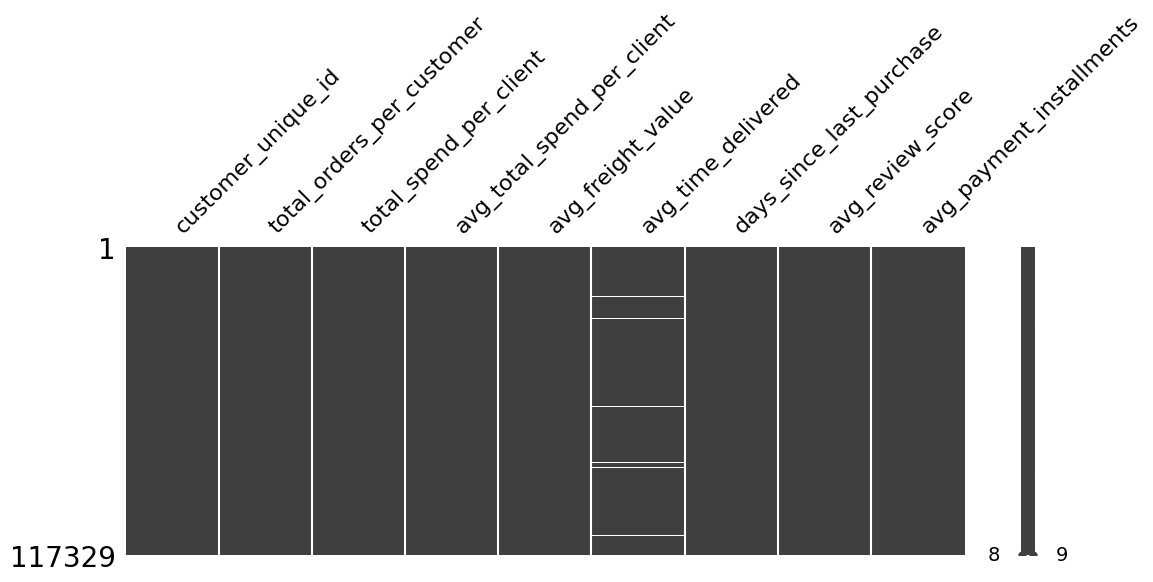

In [20]:
missingno.matrix(dataframe_cluster, figsize=(12, 4))

**Valores duplicados**

In [21]:
#Verificando a qtd de linhas duplicadas no DF
dataframe_cluster.shape[0], dataframe_cluster.duplicated().sum(), round((dataframe_cluster.duplicated().sum() / dataframe_cluster.shape[0]) * 100, 1)

(117329, 22609, 19.3)

In [22]:
#Removendo a linhas duplicadas
dataframe_cluster.drop_duplicates(inplace=True)

**Prenchecimento de Valores Vazios**

Aqui é um ponto importante, vamos preencher os valores que encontramos para a métrica *avg_time_delivered*.

Como estamos realizando uma clusterização, não será problemático.

Em casos de treinar modelos de previsão, o correto seria separar antes a bases de treino, teste e validação e utilizar o valor de preenchimento do treino para o teste e validação.

In [23]:
dataframe_cluster['avg_time_delivered'].fillna(dataframe_cluster['avg_time_delivered'].median(), inplace=True)

In [24]:
#Selecionando as variáveis numéricas com base no tipo da coluna
#Nesse caso só vai excluir o id
numerical_cols = dataframe_cluster.select_dtypes(exclude='object')

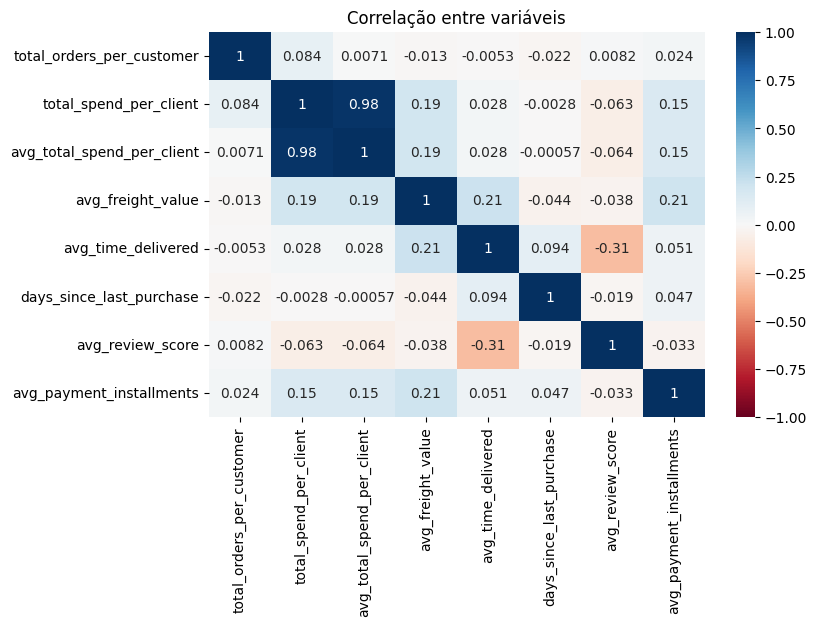

In [25]:
plt.figure(figsize=(8,5))
plt.title("Correlação entre variáveis")
sns.heatmap(numerical_cols.corr(), annot=True,
            vmin=-1, vmax=1, cmap='RdBu')
plt.show()

**Normalização dos Dados**

In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataframe_cluster.iloc[:, 1:])

### *Escolha do Modelo*

In [27]:
# Erro Quadrático para K-Means
sse_kmeans = []
for clusters_qtd in range(2, 11):
    km = KMeans(n_clusters=clusters_qtd, random_state=42)
    km.fit(scaled_features)
    sse_kmeans.append(km.inertia_)

# Erro Quadrático para MiniBatchKMeans
sse_minibatch = []
for clusters_qtd in range(2, 11):
    mbkm = MiniBatchKMeans(n_clusters=clusters_qtd, random_state=42)
    mbkm.fit(scaled_features)
    sse_minibatch.append(mbkm.inertia_)

In [28]:
# Silhueta Média para K-Means
silhouette_kmeans = []
for clusters_qtd in range(2, 11):
    km = KMeans(n_clusters=clusters_qtd, random_state=42)
    km.fit(scaled_features)
    silhouettescore = silhouette_score(scaled_features, km.labels_)
    silhouette_kmeans.append(silhouettescore)

In [29]:
# Silhueta Média para MiniBatchKMeans
silhouette_minibatch = []
for clusters_qtd in range(2, 11):
    mbkm = MiniBatchKMeans(n_clusters=clusters_qtd, random_state=42)
    mbkm.fit(scaled_features)
    silhouettescore = silhouette_score(scaled_features, mbkm.labels_)
    silhouette_minibatch.append(silhouettescore)

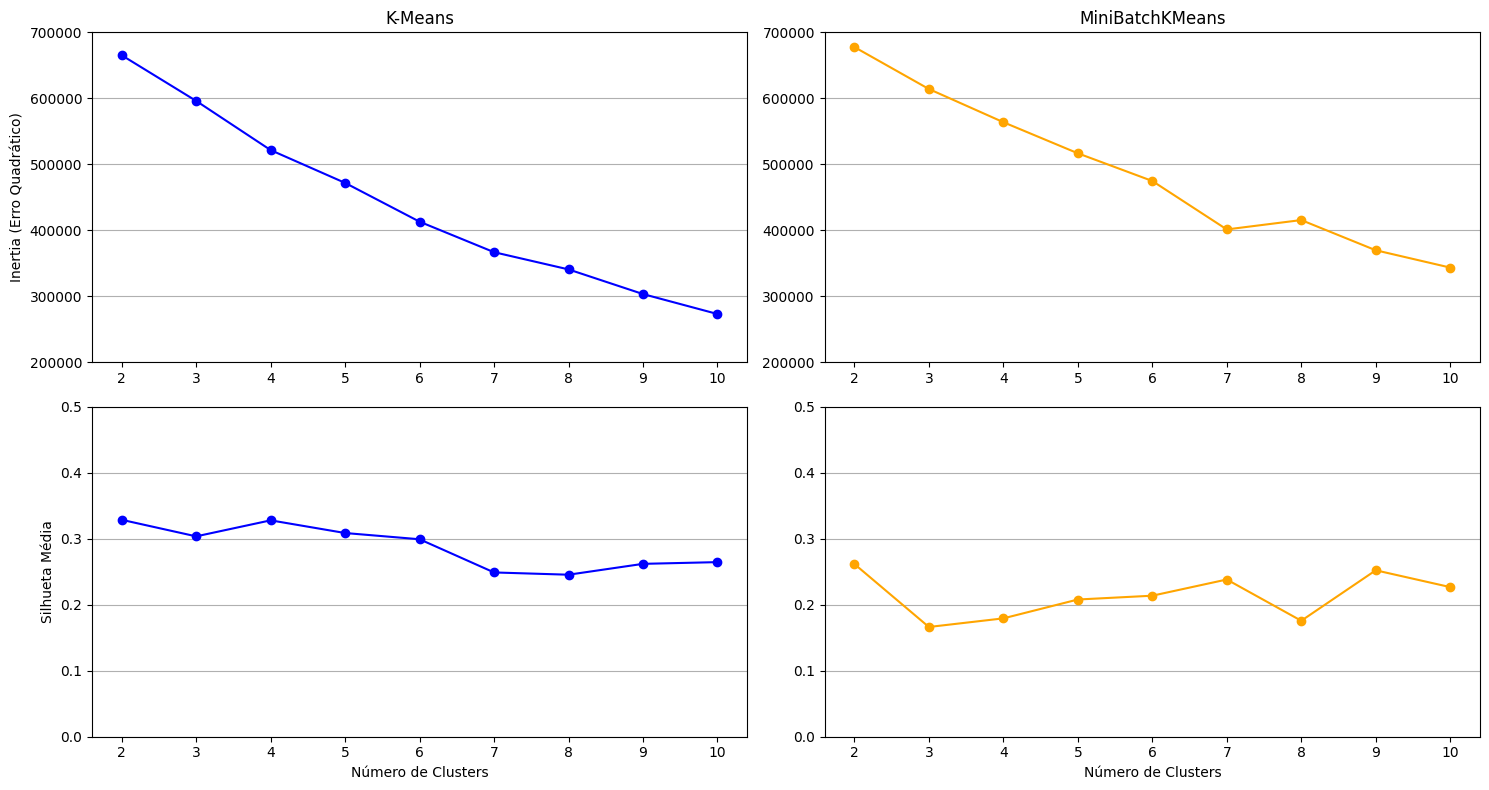

In [40]:
plt.figure(figsize=(15, 8))
nrows= 2
ncol= 2

#K-Means - Inertia
plt.subplot(nrows, ncol, 1)
plt.plot(range(2, 11), sse_kmeans, marker='o', color='blue')
plt.grid(axis='y')
plt.title('K-Means')
plt.ylabel('Inertia (Erro Quadrático)')
plt.xticks(range(2, 11))
plt.ylim(200000, 700000)

#MiniBatchKMeans - Coeficiente de Silhueta
plt.subplot(nrows, ncol, 2)
plt.plot(range(2, 11), sse_minibatch, marker='o', color='orange')
plt.grid(axis='y')
plt.title('MiniBatchKMeans')
plt.xticks(range(2, 11))
plt.ylim(200000, 700000)

#K-Means - Silhueta Média
plt.subplot(nrows, ncol, 3)
plt.plot(range(2, 11), silhouette_kmeans, marker='o', color='blue')
plt.grid(axis='y')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhueta Média')
plt.xticks(range(2, 11))
plt.ylim(0, 0.5)

#MiniBatchKMeans - Silhueta Média
plt.subplot(nrows, ncol, 4)
plt.plot(range(2, 11), silhouette_minibatch, marker='o', color='orange')
plt.grid(axis='y')
plt.xlabel('Número de Clusters')
plt.xticks(range(2, 11))
plt.ylim(0, 0.5)

plt.tight_layout()
plt.show()

**Interpretação das Métricas**

**Inércia**:
- **Baixa inércia**: Os pontos estão mais próximos dos centroides, estão mais definidos e compactos.
- **Alta inércia**: Os pontos estão mais distantes dos centroides, estão menos definidos e compactos.

**Silhueta Média**:
- **Próximo de 01**: Os pontos estão mais agrupados.
- **Próximo de 00**: Os pontos estão mais próximos na frontreira entre dois clusters.
- **Negativo**: Os pontos podem estar classificados incorretamente em um cluster que não representa bem sua localização.

---
**Escolha do Modelo**

**Modelo:** K-Means

Observando o desempenho na inércia entre ambos os modelos é bastante semelhante. No K-Means tem uma redução maior de acordo com a quantidade de clusters.
Na Silhueta Média, o Mini Batch K-Means possui um resultado pior, não passa do 0.3 em nenhuma quantidade de cluster.

**Quantidade de Clusters:** 06

A perda de valor na silhueta média entre 05 e 06 clusters é pouco, então será possível segmentar um pouco mais os clientes.

### *Modelo*

In [31]:
kmeans = KMeans(n_clusters=6, n_init=10, init="random", max_iter=300)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=6, n_init=10)

In [32]:
dataframe_kmeans = dataframe_cluster.copy()
dataframe_kmeans.drop(columns= "customer_unique_id", axis=1, inplace=True)
dataframe_kmeans['cluster'] = kmeans.labels_
dataframe_kmeans.head()

,total_orders_per_customer,total_spend_per_client,avg_total_spend_per_client,avg_freight_value,avg_time_delivered,days_since_last_purchase,avg_review_score,avg_payment_installments,cluster
0,1,146.87,146.87,21.88,8.0,474,4.0,2.0,4
1,1,335.48,335.48,46.48,16.0,233,5.0,8.0,3
2,1,157.73,157.73,17.79,26.0,106,5.0,7.0,3
3,1,173.30,173.30,23.36,14.0,173,5.0,1.0,5
4,1,252.25,252.25,22.25,11.0,35,5.0,8.0,3


---

# **Análise**

In [33]:
dataframe_kmeans.groupby("cluster").mean()

,total_orders_per_customer,total_spend_per_client,avg_total_spend_per_client,avg_freight_value,avg_time_delivered,days_since_last_purchase,avg_review_score,avg_payment_installments
cluster,,,,,,,,
0,2.113517,452.296242,213.241305,18.916780,11.786690,225.408662,4.147480,3.294101
1,1.193548,21460.546452,19759.504516,37.009008,13.294624,234.645161,2.354839,4.239785
2,1.000000,197.022264,197.022264,20.231555,21.064287,242.125878,1.545235,2.588531
3,1.000162,541.126367,540.784599,36.451564,12.699472,239.828664,4.290296,7.880602
4,1.000000,136.936466,136.936466,17.151521,10.934859,396.916031,4.590681,2.157158
5,1.000000,132.328865,132.328865,17.263602,9.200135,126.904392,4.636271,1.904713


In [34]:
dataframe_kmeans.groupby("cluster").median()

,total_orders_per_customer,total_spend_per_client,avg_total_spend_per_client,avg_freight_value,avg_time_delivered,days_since_last_purchase,avg_review_score,avg_payment_installments
cluster,,,,,,,,
0,2.0,261.140,126.900,16.43,10.333333,204.0,4.666667,2.333333
1,1.0,17069.760,14401.000,24.49,11.000000,234.0,1.000000,1.000000
2,1.0,118.720,118.720,17.06,17.000000,219.0,1.000000,2.000000
3,1.0,280.590,280.590,23.84,11.000000,225.0,5.000000,8.000000
4,1.0,92.190,92.190,15.48,10.000000,386.0,5.000000,1.000000
5,1.0,93.155,93.155,15.58,8.000000,125.0,5.000000,1.000000


In [35]:
dataframe_kmeans.groupby("cluster").quantile(0.75)

,total_orders_per_customer,total_spend_per_client,avg_total_spend_per_client,avg_freight_value,avg_time_delivered,days_since_last_purchase,avg_review_score,avg_payment_installments
cluster,,,,,,,,
0,2.0,464.100,219.3675,20.6800,14.6,325.0,5.0,5.000000
1,1.0,20901.820,18920.6900,41.4300,14.5,326.0,4.0,8.716667
2,1.0,216.140,216.1400,22.0600,29.0,301.0,2.0,4.000000
3,1.0,589.735,589.5700,44.4850,16.0,347.0,5.0,10.000000
4,1.0,156.640,156.6400,18.0825,14.0,471.0,5.0,3.000000
5,1.0,155.980,155.9800,19.5100,12.0,189.0,5.0,3.000000


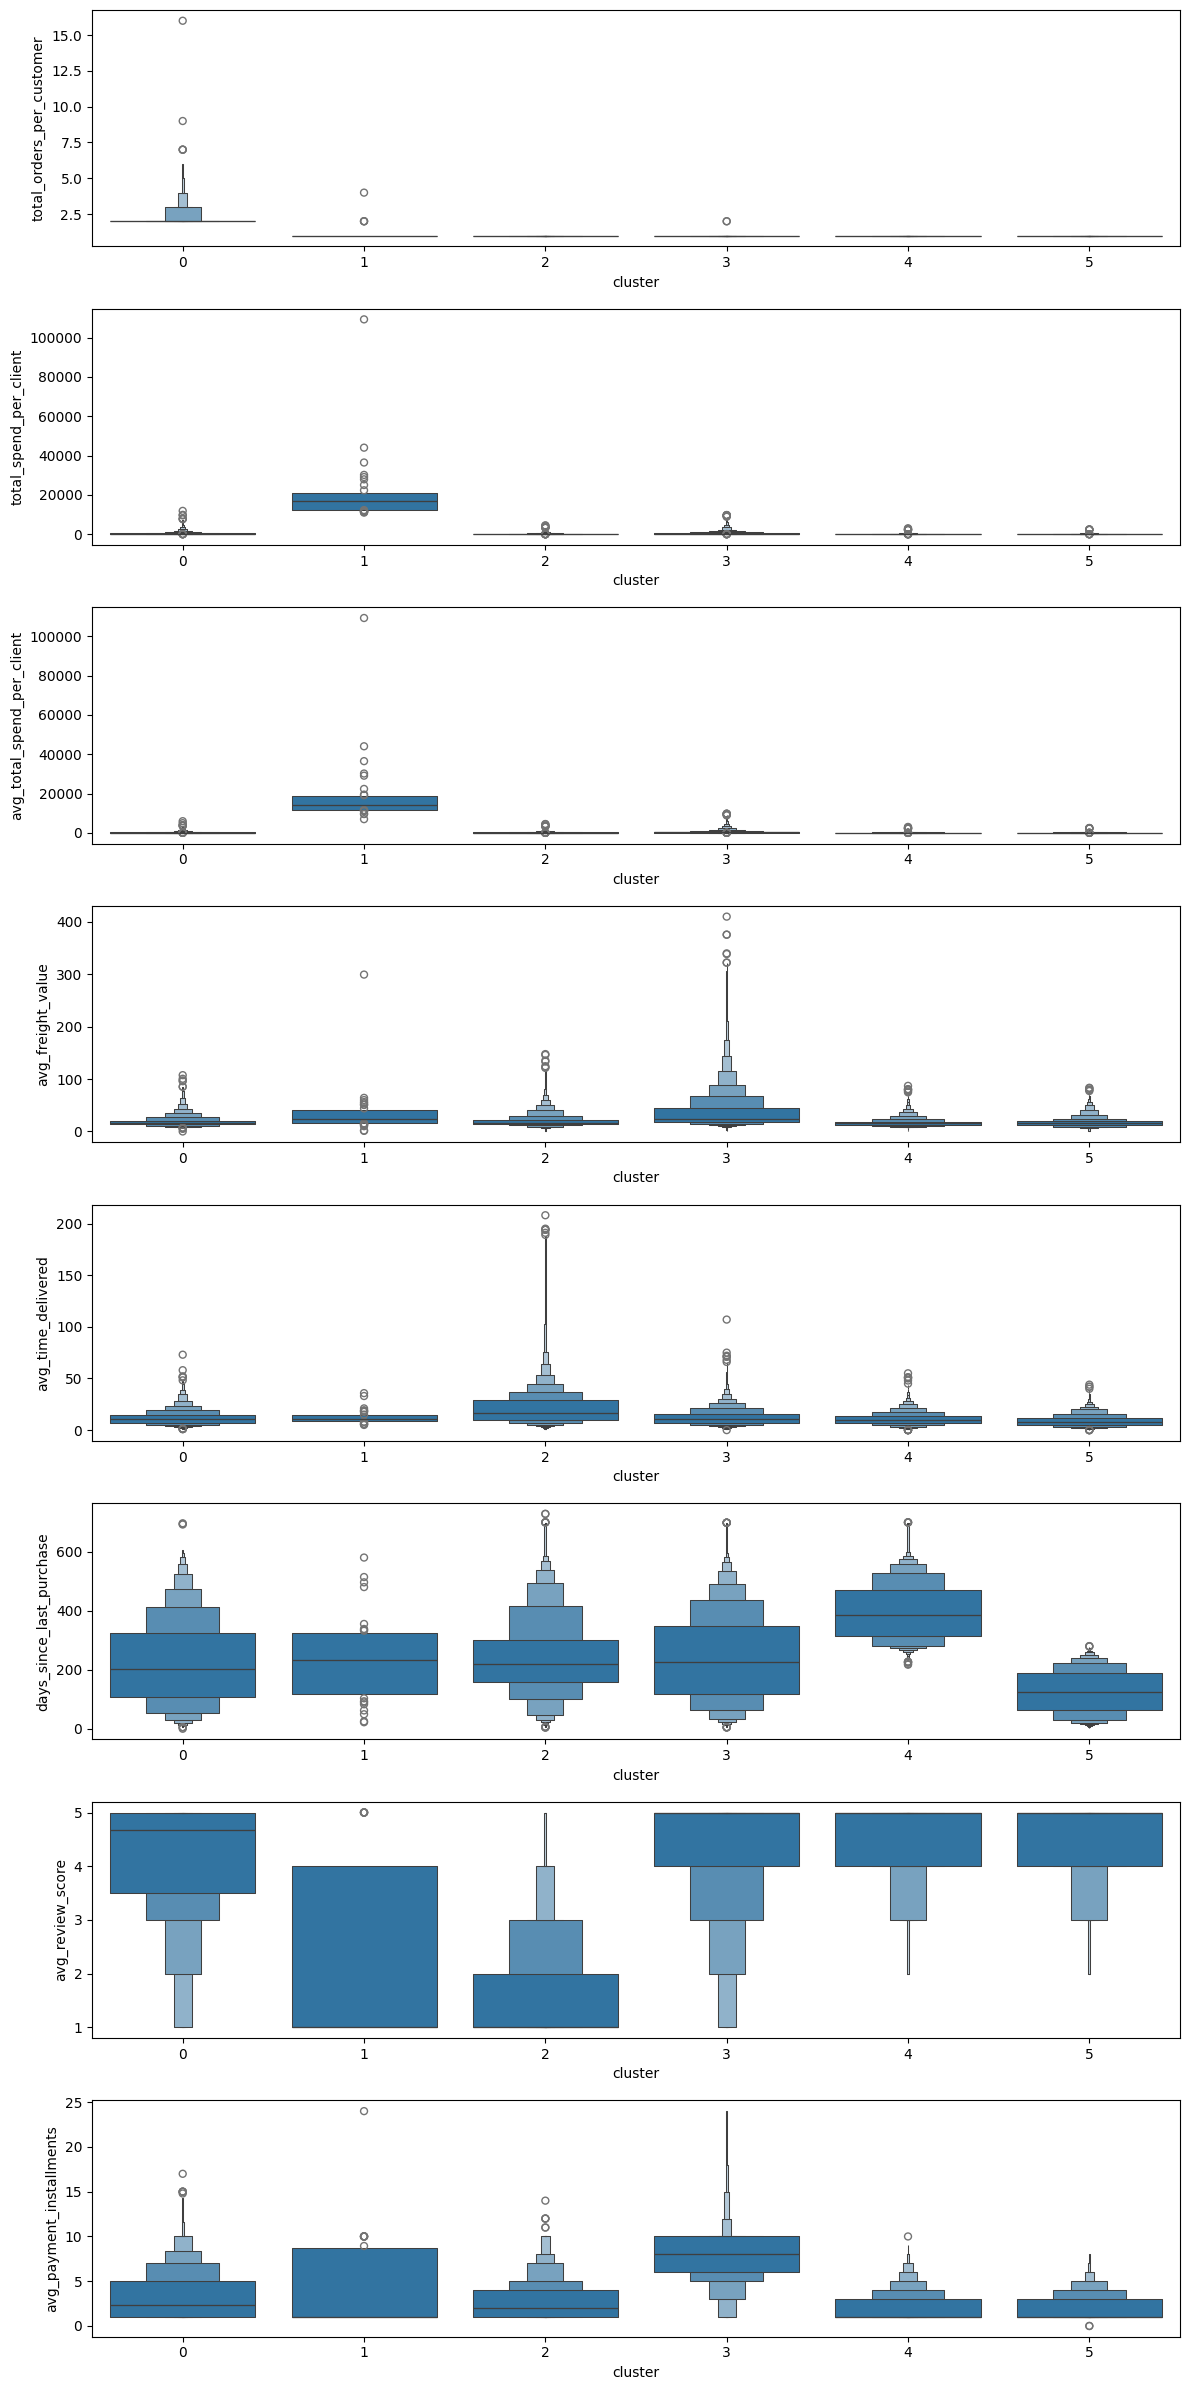

In [36]:
nrows = len(dataframe_kmeans.columns[:-1])

plt.figure(figsize=(12, nrows * 3))

for i, var in enumerate(dataframe_kmeans.columns[:-1]):
    plt.subplot(nrows, 1, i + 1)
    sns.boxenplot(data=dataframe_kmeans, x='cluster', y=var)
    plt.ylabel(var)

plt.tight_layout()
plt.show()

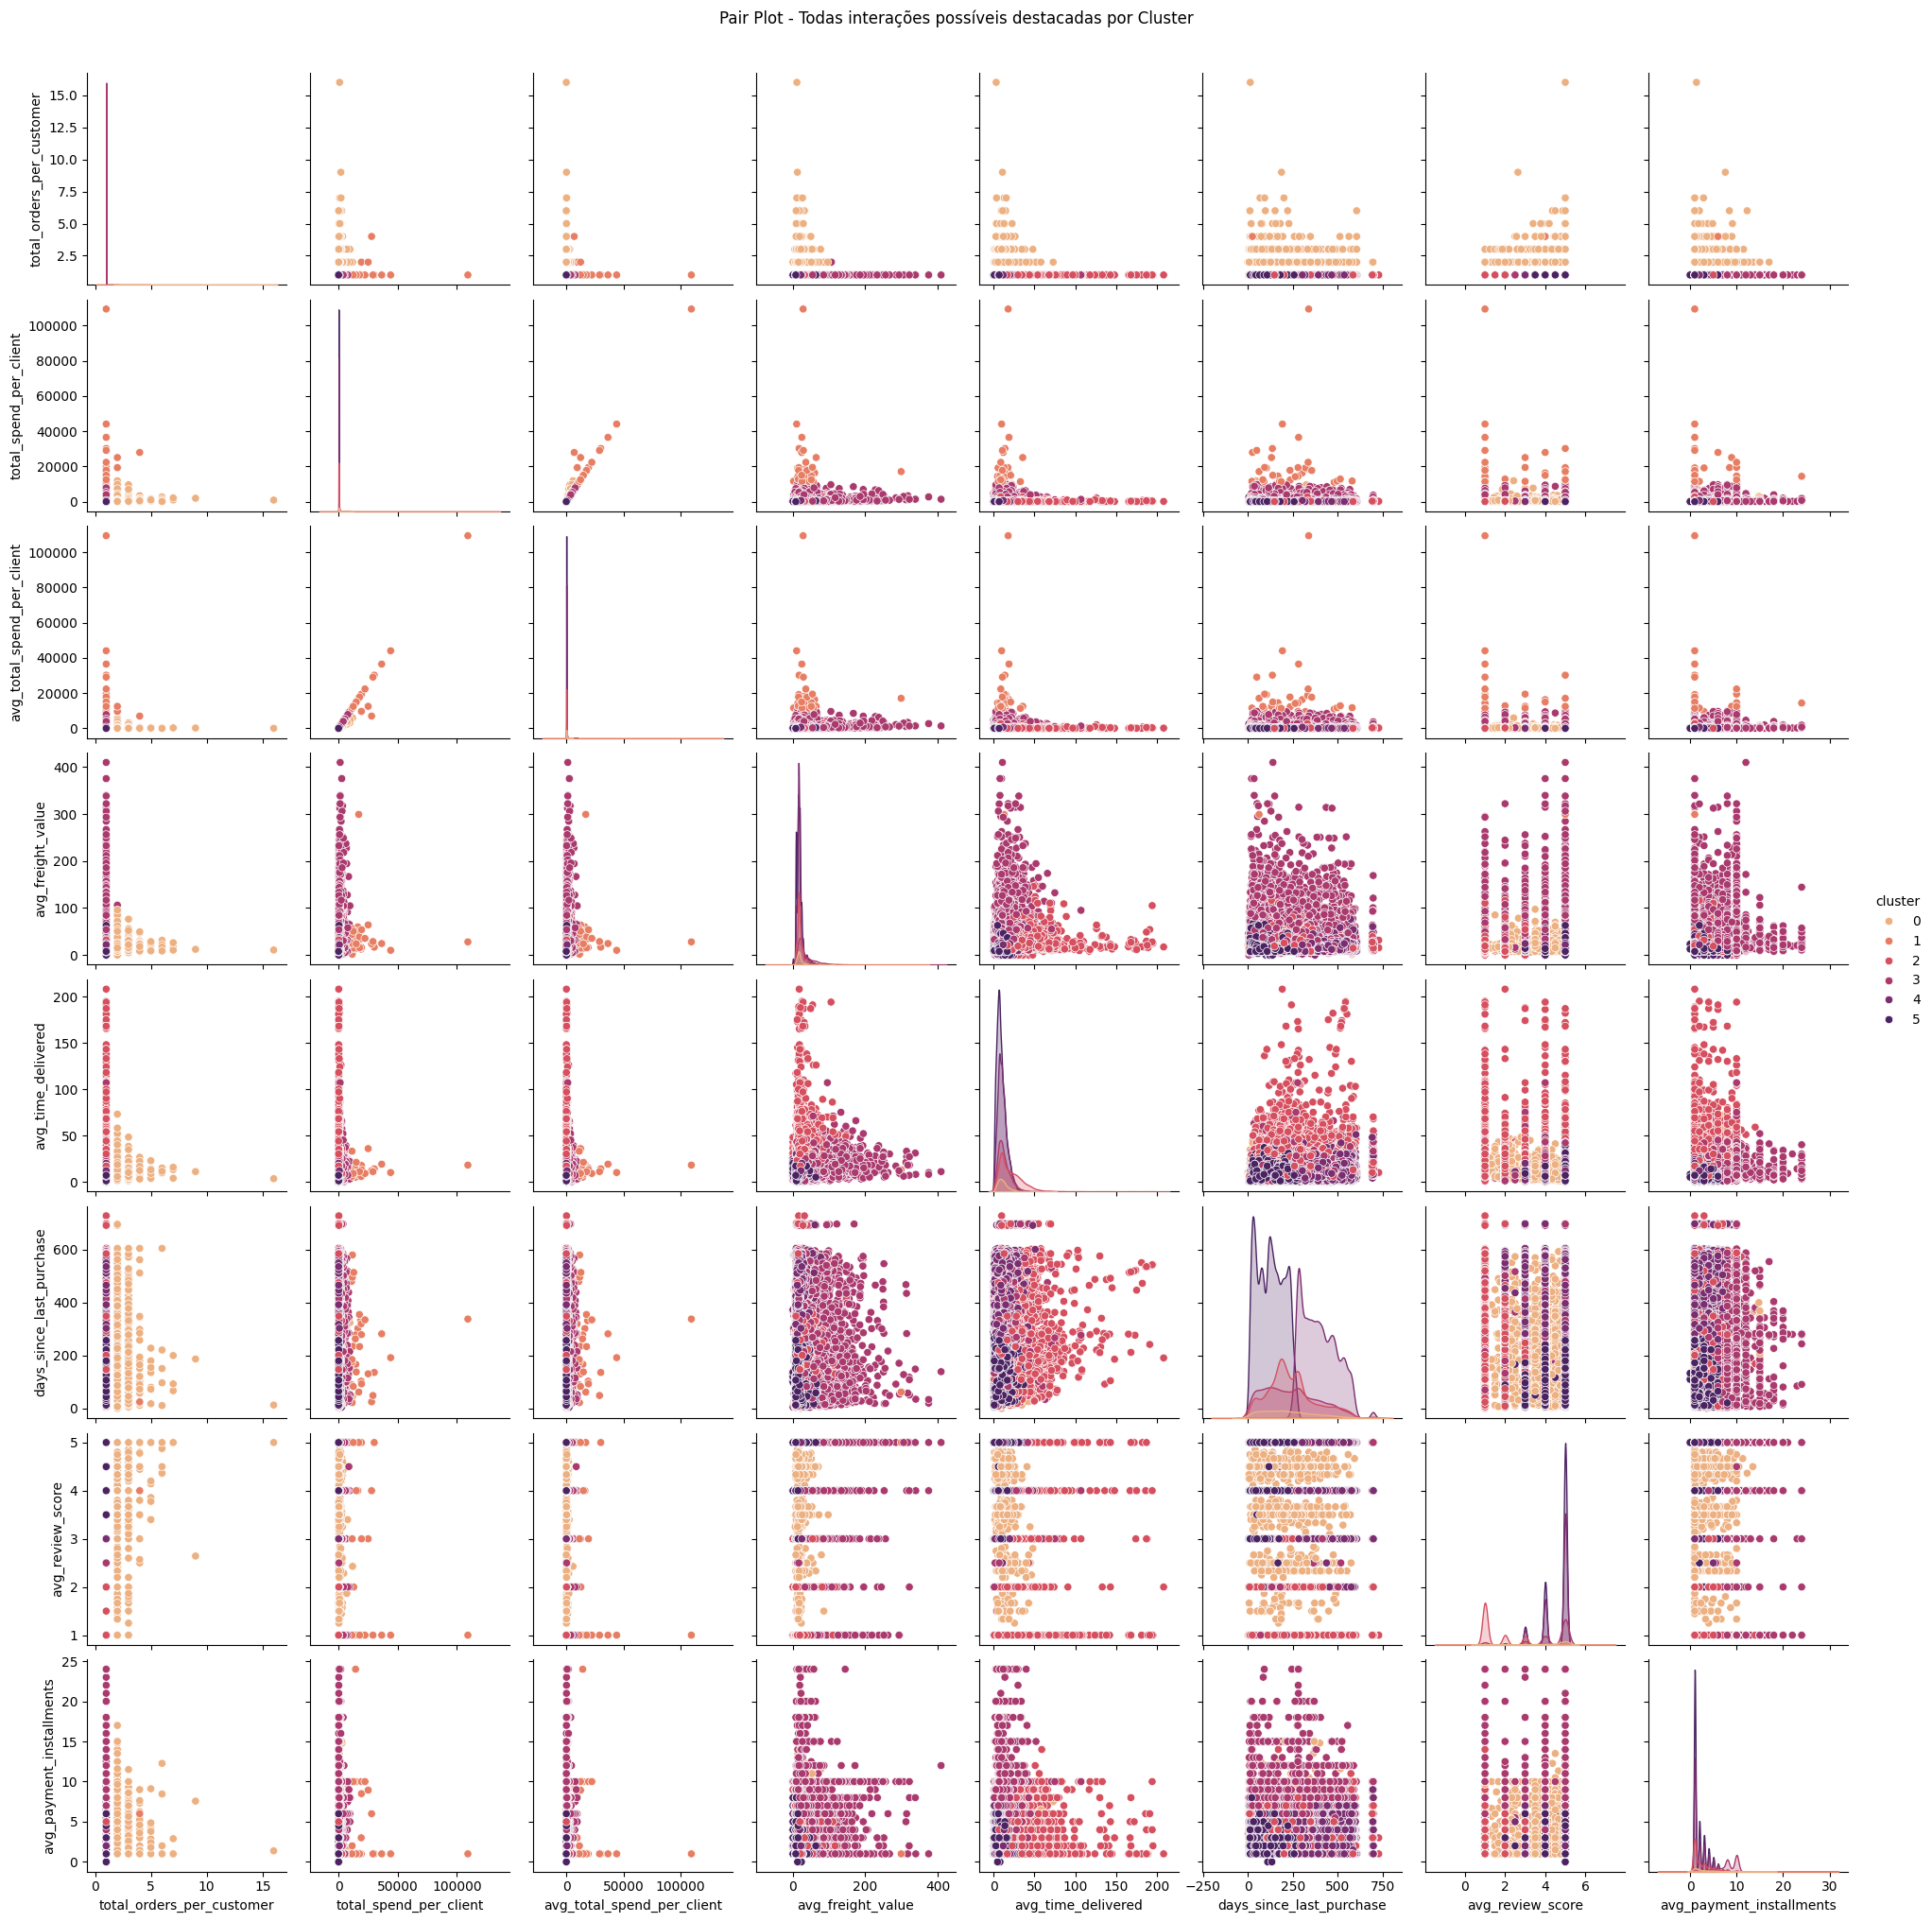

In [37]:
#Todas interações possíveis destacadas por Cluster
sns.pairplot(dataframe_kmeans, hue='cluster', palette='flare')
plt.suptitle("Pair Plot - Todas interações possíveis destacadas por Cluster", y=1.02)
plt.show()

In [38]:
dataframe_kmeans.columns

Index(['total_orders_per_customer', 'total_spend_per_client',
       'avg_total_spend_per_client', 'avg_freight_value', 'avg_time_delivered',
       'days_since_last_purchase', 'avg_review_score',
       'avg_payment_installments', 'cluster'],
      dtype='object')